In [35]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

rcParams["figure.figsize"] = (20, 5)

# 国勢調査データの準備

[中野区HP](https://www.city.tokyo-nakano.lg.jp/nakano/figure/007/005/index.html)の国勢調査データをCSV化したものを読み込み、shape、欠損値、基礎統計量を確認。


In [36]:
area_h17 = pd.read_csv('areaH17.csv', delimiter='\t')
area_h22 = pd.read_csv('areaH22.csv', delimiter='\t')
area_h27 = pd.read_csv('areaH27.csv', delimiter='\t')

age_h17 = pd.read_csv('nendaiH17.csv', delimiter='\t')
age_h22 = pd.read_csv('nendaiH22.csv', delimiter='\t')
age_h27 = pd.read_csv('nendaiH27.csv', delimiter='\t')

# 件数確認
print(f'#{area_h17.shape}, #{area_h22.shape}, #{area_h27.shape}')
print(f'#{age_h17.shape}, #{age_h22.shape}, #{age_h27.shape}\n')

# 欠損値確認
print(f'\n{area_h17.isnull().any()}\n\n{area_h22.isnull().any()}\n\n{area_h27.isnull().any()}\n')
print(f'\n{age_h17.isnull().any()}\n\n{age_h22.isnull().any()}\n\n{age_h27.isnull().any()}')

#(104, 8), #(104, 8), #(104, 8)
#(21, 4), #(21, 4), #(21, 4)


町丁別          False
世帯数          False
総数           False
男            False
女            False
男per女100人    False
人口密度         False
小計           False
dtype: bool

町丁別          False
世帯数          False
総数           False
男            False
女            False
男per女100人    False
人口密度         False
小計           False
dtype: bool

町丁別          False
世帯数          False
総数           False
男            False
女            False
男per女100人    False
人口密度         False
小計           False
dtype: bool


class    False
総数       False
男        False
女        False
dtype: bool

class    False
総数       False
男        False
女        False
dtype: bool

class    False
総数       False
男        False
女        False
dtype: bool


In [37]:
elem_ord = ['０～４', '５～９', '１０～１４', '１５～１９', '２０～２４', '２５～２９', '３０～３４', '３５～３９', '４０～４４', '４５～４９', '５０～５４', '５５～５９', '６０～６４', '６５～６９', '７０～７４', '７５～７９', '８０～８４', '８５～８９', '９０～９４', '９５～９９', '１００以上']

age_h17['class'] = pd.Categorical(age_h17['class'], elem_ord, ordered=True)
age_h22['class'] = pd.Categorical(age_h22['class'], elem_ord, ordered=True)
age_h27['class'] = pd.Categorical(age_h27['class'], elem_ord, ordered=True)



# データ型確認
print(f'\n{area_h17.dtypes}\n\n{area_h22.dtypes}\n\n{area_h27.dtypes}\n')
print(f'{age_h17.dtypes}\n\n{age_h22.dtypes}\n\n{age_h27.dtypes}')



町丁別           object
世帯数            int64
総数             int64
男              int64
女              int64
男per女100人    float64
人口密度           int64
小計             int64
dtype: object

町丁別           object
世帯数            int64
総数             int64
男              int64
女              int64
男per女100人    float64
人口密度           int64
小計             int64
dtype: object

町丁別           object
世帯数            int64
総数             int64
男              int64
女              int64
男per女100人    float64
人口密度           int64
小計             int64
dtype: object

class    category
総数          int64
男           int64
女           int64
dtype: object

class    category
総数          int64
男           int64
女           int64
dtype: object

class    category
総数          int64
男           int64
女           int64
dtype: object


In [38]:
# 基本統計量
print(f'H17\n#{area_h17.describe(include="all")}')
print(f'H22\n#{area_h22.describe(include="all")}')
print(f'H27\n#{area_h27.describe(include="all")}')

H17
#          町丁別           世帯数            総数             男             女  \
count     104    104.000000    104.000000    104.000000    104.000000   
unique    104           NaN           NaN           NaN           NaN   
top     鷺宮三丁目           NaN           NaN           NaN           NaN   
freq        1           NaN           NaN           NaN           NaN   
mean      NaN   3322.807692   5973.596154   2983.519231   2990.076923   
std       NaN   3323.865594   5764.091674   2888.502565   2878.697017   
min       NaN    559.000000   1258.000000    576.000000    682.000000   
25%       NaN   1529.750000   3088.250000   1525.750000   1533.750000   
50%       NaN   2039.500000   3853.000000   1910.500000   1895.500000   
75%       NaN   3182.500000   5435.000000   2761.750000   2658.750000   
max       NaN  16436.000000  27613.000000  13860.000000  14020.000000   

         男per女100人          人口密度          小計  
count   104.000000    104.000000  104.000000  
unique         NaN      

In [39]:
print(f'H17\n#{age_h17.describe(include="all")}')
print(f'H22\n#{age_h22.describe(include="all")}')
print(f'H27\n#{age_h27.describe(include="all")}')


H17
#        class            総数             男             女
count      20     21.000000     21.000000     21.000000
unique     20           NaN           NaN           NaN
top     ５０～５４           NaN           NaN           NaN
freq        1           NaN           NaN           NaN
mean      NaN  14780.571429   7381.523810   7399.047619
std       NaN   9934.167975   5438.433714   4545.854523
min       NaN     62.000000      6.000000     56.000000
25%       NaN   8494.000000   4301.000000   4193.000000
50%       NaN  14913.000000   6450.000000   8408.000000
75%       NaN  21336.000000  10702.000000  10463.000000
max       NaN  34081.000000  18348.000000  15733.000000
H22
#        class            総数             男             女
count      21     21.000000     21.000000     21.000000
unique     21           NaN           NaN           NaN
top     １００以上           NaN           NaN           NaN
freq        1           NaN           NaN           NaN
mean      NaN  14710.761905   7325.428

# 平成22年と平成27年の調査データの比較

年代別人口増減データと地域別人口増減データをそれぞれ可視化し、平成22年と平成27年の差分も可視化。

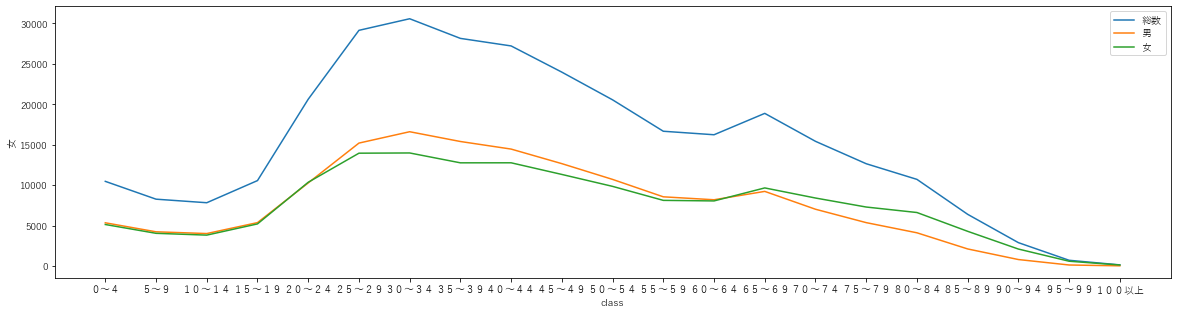

In [40]:
sns.lineplot(age_h27['class'],age_h27['総数'], legend='brief', label='総数'  )
sns.lineplot(age_h27['class'],age_h27['男'], legend='brief', label='男'  )
sns.lineplot(age_h27['class'],age_h27['女'], legend='brief', label='女'  )

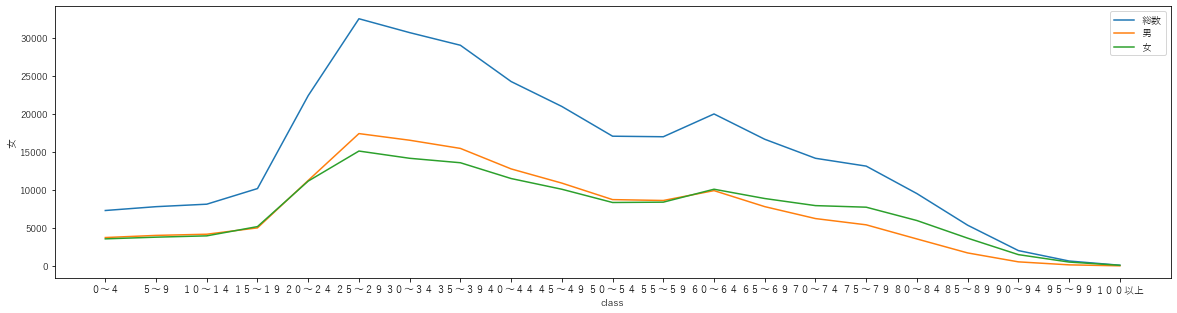

In [41]:
sns.lineplot(age_h22['class'],age_h22['総数'], legend='brief', label='総数'  )
sns.lineplot(age_h22['class'],age_h22['男'], legend='brief', label='男'  )
sns.lineplot(age_h22['class'],age_h22['女'], legend='brief', label='女'  )

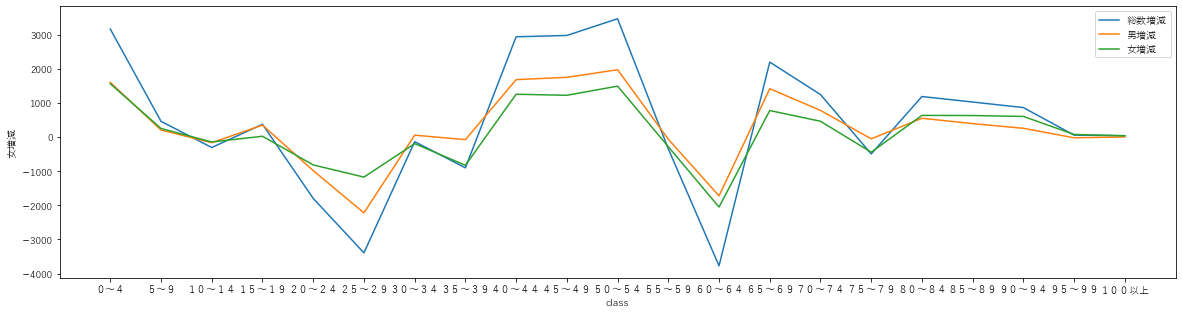

In [42]:
age_h27['総数増減'] = age_h27['総数'] - age_h22['総数']
age_h27['男増減'] = age_h27['男'] - age_h22['男']
age_h27['女増減'] = age_h27['女'] - age_h22['女']

sns.lineplot(age_h27['class'],age_h27['総数増減'], legend='brief', label='総数増減' )
sns.lineplot(age_h27['class'],age_h27['男増減'], legend='brief', label='男増減' )
sns.lineplot(age_h27['class'],age_h27['女増減'], legend='brief', label='女増減' )

年代によってかなり変動に差がある。

* 25-29歳男性が大きく減少
* 40-54歳男性が大きく増加
* 60-64歳男性が大きく減少
* 女性の変動もおおむね男性と同じ傾向だが、全体的に緩やかな変化にとどまる

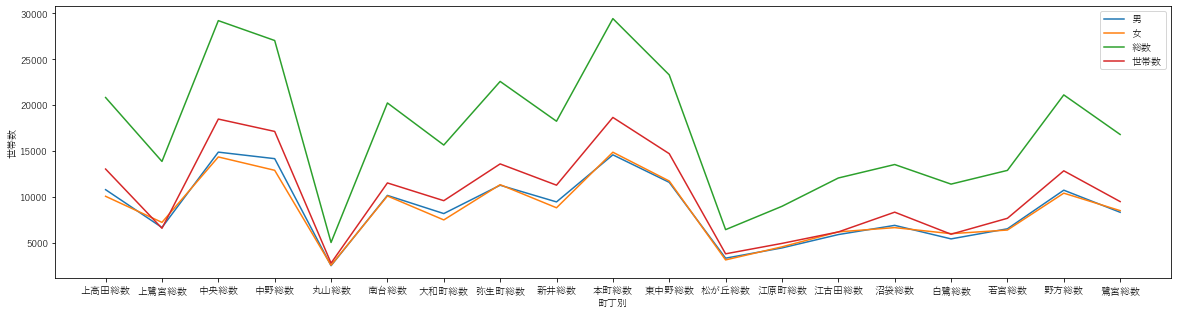

In [52]:
areaplot_x = area_h27['町丁別'][area_h27['小計'] == 1]
sns.lineplot(areaplot_x, area_h27['男'], legend='brief', label='男' )
sns.lineplot(areaplot_x, area_h27['女'], legend='brief', label='女' )
sns.lineplot(areaplot_x, area_h27['総数'], legend='brief', label='総数' )
sns.lineplot(areaplot_x, area_h27['世帯数'], legend='brief', label='世帯数' )


* 丸山地域と松ヶ丘地域では男・女と世帯数との差が小さく、総数の半分程度となっている。ほかの地域では世帯数が男（女）を上回る地域が多く、これは単身世帯によるもの？
* ごく一部で世帯数が男（女）を下回る地域があるが、これは子供が多い？（言い切れないかも）


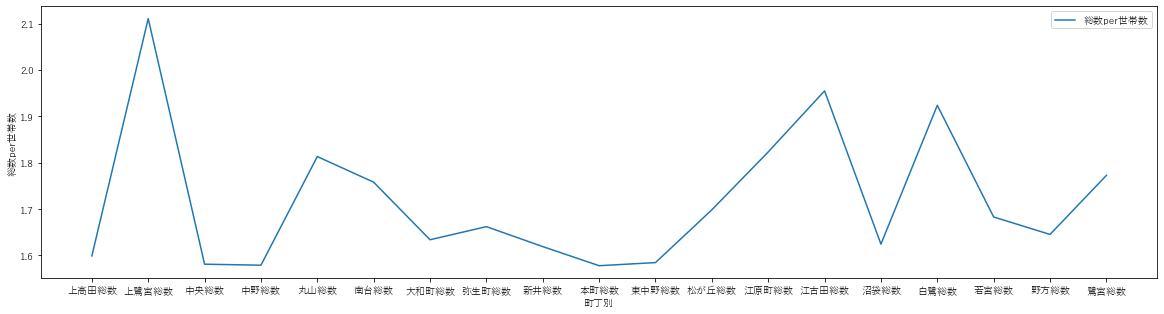

In [53]:
area_h27['総数per世帯数'] = area_h27['総数'] / area_h27['世帯数']
sns.lineplot(areaplot_x, area_h27['総数per世帯数'], legend='brief', label='総数per世帯数' )


* 

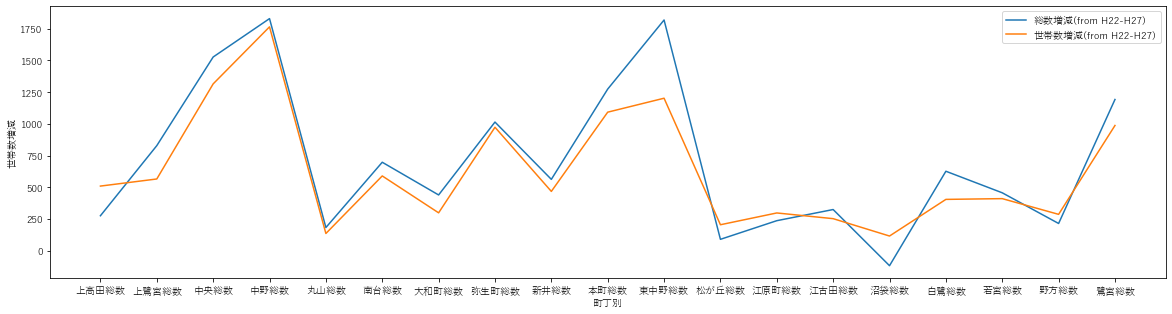

In [45]:
area_h27['総数増減'] = area_h27['総数'] - area_h22['総数']
area_h27['世帯数増減'] = area_h27['世帯数'] - area_h22['世帯数']

sns.lineplot(areaplot_x,area_h27['総数増減'], legend='brief', label='総数増減(from H22-H27)' )
sns.lineplot(areaplot_x,area_h27['世帯数増減'], legend='brief', label='世帯数増減(from H22-H27)' )


* ほぼすべての地域で増加傾向。沼袋地域のみ、総数はわずかに減少も、世帯数は増加。
* 東中野地域と白鷺地域では総数増加量が世帯数増加量を大きく上回る。これは単身者ではなく、家族の転入および出生者による可能性が高い？


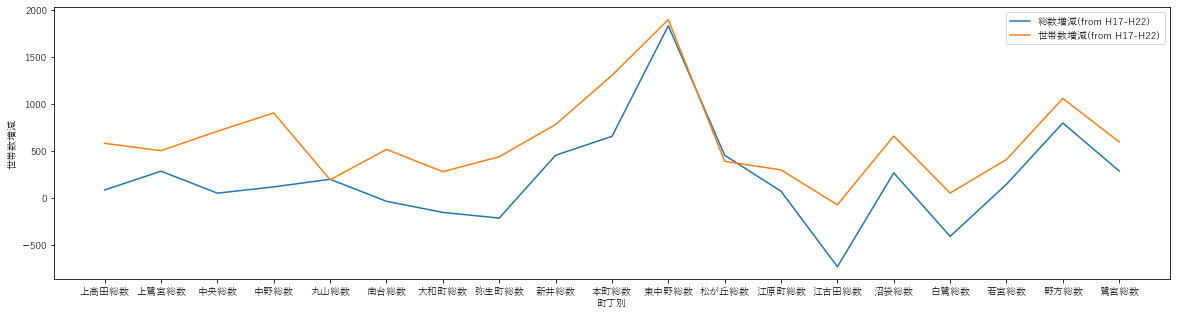

In [46]:
area_h22['総数増減'] = area_h22['総数'] - area_h17['総数']
area_h22['世帯数増減'] = area_h22['世帯数'] - area_h17['世帯数']

sns.lineplot(areaplot_x,area_h22['総数増減'], legend='brief', label='総数増減(from H17-H22)' )
sns.lineplot(areaplot_x,area_h22['世帯数増減'], legend='brief', label='世帯数増減(from H17-H22)' )

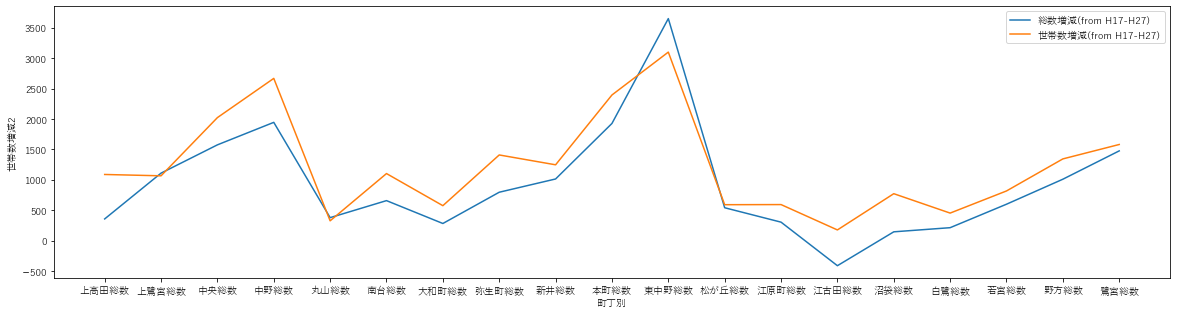

In [47]:
area_h27['総数増減2'] = area_h27['総数'] - area_h17['総数']
area_h27['世帯数増減2'] = area_h27['世帯数'] - area_h17['世帯数']

sns.lineplot(areaplot_x,area_h27['総数増減2'], legend='brief', label='総数増減(from H17-H27)' )
sns.lineplot(areaplot_x,area_h27['世帯数増減2'], legend='brief', label='世帯数増減(from H17-H27)' )

H17年とH27年を比較すると増加傾向に変化がある。H22-H27では総数増加が支配的だがH17-H27では世帯数増加が支配的となっているがある。

H17-H27では世帯数が増加していたが、H22-H27では総数が上回っている地域では、子供が増えている可能性がある？

# 人口分布による地域のクラスタリング

地域別データを正規化し階層クラスタリングしてみる。


0      1      2      3      4      5     6      7      8      9   \
count  19.00  19.00  19.00  19.00  19.00  19.00  19.0  19.00  19.00  19.00   
mean   -0.00  -0.00  -0.00   0.00   0.00  -0.00   0.0  -0.00  -0.00  -0.00   
std     1.03   1.03   1.03   1.03   1.03   1.03   0.0   1.03   1.03   1.03   
min    -1.61  -1.75  -1.73  -1.76  -1.99  -1.59   0.0  -1.46  -1.13  -1.51   
25%    -0.84  -0.69  -0.70  -0.67  -0.59  -0.73   0.0  -0.80  -0.74  -0.67   
50%    -0.16  -0.07  -0.11  -0.03  -0.08  -0.13   0.0  -0.26  -0.35  -0.30   
75%     0.63   0.65   0.64   0.66   0.72   0.63   0.0   0.69   0.79   0.42   
max     1.77   1.73   1.71   1.83   1.65   2.11   0.0   1.97   2.53   3.08   

          10  
count  19.00  
mean    0.00  
std     1.03  
min    -1.33  
25%    -0.80  
50%    -0.18  
75%     0.34  
max     2.36  
[6 6 1 1 1 2 6 6 5 3 3 3 3 6 5 5 3 4 4]


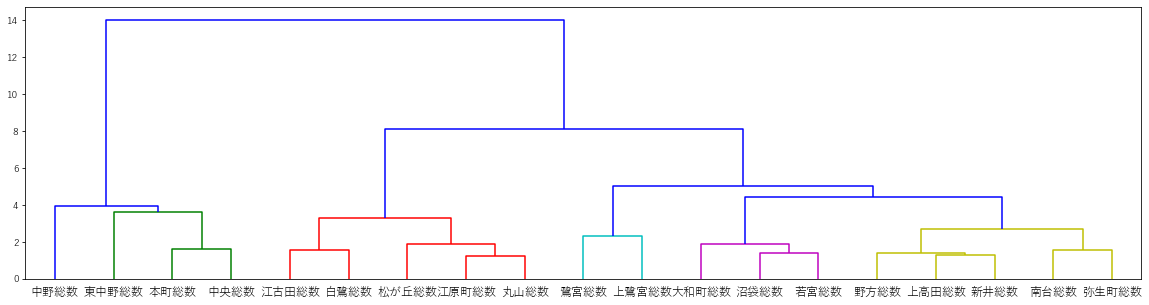

In [48]:
# 人口分布による地域のクラスタリング
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

scaler = StandardScaler()

area_h27_norm = pd.DataFrame(scaler.fit_transform(area_h27[area_h27['小計'] == 1].set_index('町丁別')))

print(area_h27_norm.describe().round(2))

result1 = linkage(area_h27_norm,
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  #method = 'average')
                  method = 'ward')
                  #method= 'complete')
                  #method='weighted')
dendrogram(result1, color_threshold=3.7, labels=tuple(areaplot_x));
print(fcluster(result1, 6, criterion='maxclust') )

# todo
* 各地域別に保育所や学童保育のデータを当ててみて、何か見えないか？
* 総数が世帯数より大きく増加している白鷺地域と同一クラスタとなっている上鷺宮地域、江原町地域、江古田地域になにか特徴がないか？
* 地域の人口増減をパラメーターにクラスタリングしてみる？

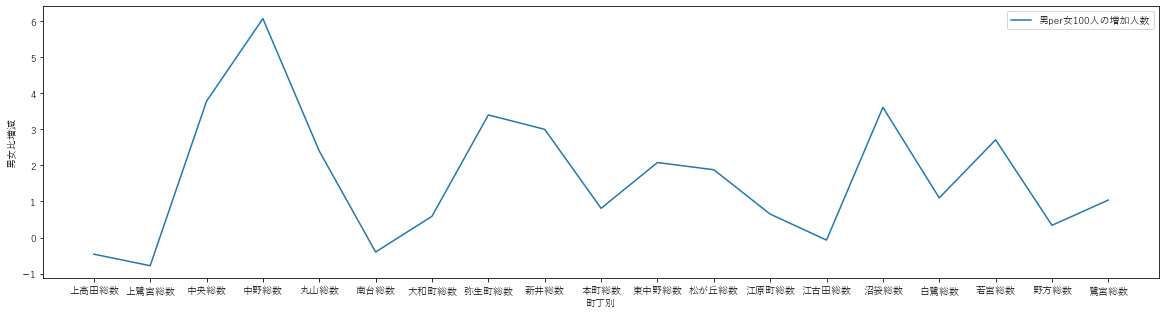

In [49]:
area_h27['男女比増減'] = area_h27['男per女100人'] - area_h22['男per女100人']
sns.lineplot(areaplot_x,area_h27['男女比増減'], legend='brief', label='男per女100人の増加人数' )